In [2]:
import os
import numpy as np
from astropy import units as u 
from astropy import coordinates
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy

%matplotlib inline

### Read the output of <code>SExtractor</code>

We extract the source with threshold 3 sigma

In [3]:
def read_sexofile(filename = "J0423-0120_B3.cat"):
    pars = []
    # only get the header
    with open(filename, 'r') as ifile:
        for line in ifile:
            if line[0] == '#': 
                pars.append(line.split()[2])
    print 'Col names: ', pars
    
    # get the data
    data = np.genfromtxt(filename, names=pars) # already in np array
    
    return data

In [4]:
data = read_sexofile("J0423-0120_B3.cat")

Col names:  ['NUMBER', 'FLUX_ISO', 'FLUXERR_ISO', 'FLUX_AUTO', 'FLUXERR_AUTO', 'FLUX_BEST', 'FLUXERR_BEST', 'BACKGROUND', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_SKY', 'DELTA_SKY', 'ALPHA_J2000', 'DELTA_J2000']


In [5]:
ra, dec, flux = data['ALPHA_J2000'], data['DELTA_J2000'], data['FLUX_BEST']
label = data['NUMBER'].astype('int')

In [6]:
flux.min(), flux.max(), flux.mean()

(0.0048107039999999998, 0.2193959, 0.032339699216216218)

### Read the fits file  (B3)

In [7]:
B3 = './images/J0423-0120_B3.fits'
rmsB3 = 3.3E-05

center_x = [65.815836375, 65.815836375, 65.81583637500] 
center_y= [-1.342518194444, -1.342518194444, -1.342518194444]
PB = np.array([58., 24.,18.])/3600.0 # in deg

In [8]:
multp = np.array([2.5, 3, 3.5, 4.5, 5, 5.5, 6, 10, 100, 1000, 10000])
lvlB3 = rmsB3*multp

### Comparing the contour and SExtractor result

In here
+ I make the size of marker depend on the Flux
+ I can give number to for easy identification from SExtractor result

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


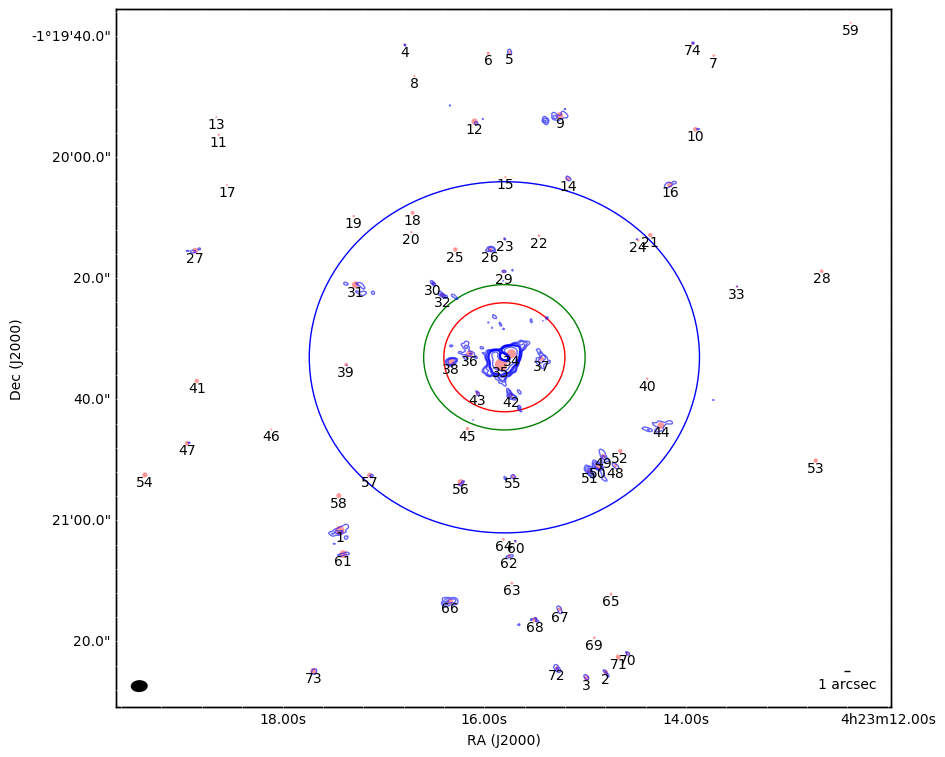

In [14]:
fig = aplpy.FITSFigure(B3)
fig.add_beam()
fig.beam.set_color('black')
fig.add_scalebar(1 * u.arcsecond)
fig.scalebar.set_label('1 arcsec')
fig.scalebar.set_color("black")

fig.show_contour(B3, colors='blue', levels=lvlB3, alpha=0.6)

marker_size =  80 * flux/flux.max()
fig.show_markers(ra, dec, edgecolor='none', facecolor='red', marker='o', s=marker_size, alpha=0.4)
# primary beam circle
fig.show_circles(center_x, center_y, PB/2.0, edgecolor=['blue', 'green', 'red'])

for i, lbl in enumerate(label): 
    fig.add_label(ra[i], dec[i]-0.00032, lbl)

#fig.show_colorscale()

<code>SExtractor</code> mark several source outside the 'contour', I think because Sextractor get the different RMS.

### Comparing the contour with NED database

Query using <code>astroquery</code> around calibrator

In [11]:
from astroquery.ned import Ned

co = coordinates.SkyCoord(ra=65.81583637500, dec=-1.342518194444, unit=(u.deg, u.deg), frame='fk5')
result = Ned.query_region(co, radius=2*u.arcmin, equinox='J2000.0')

result

No.,Object Name,RA(deg),DEC(deg),Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Distance (arcmin),References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcm,,,,,,,
int32,str30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,PKS 0420-01:[KSS94] 13,65.78792,-1.33917,G,--,--,,21.8,1.6870000000000001,1,0,0,0,0,0,0
2,PKS 0420-01:[KSS94] 18,65.791669999999996,-1.3474999999999999,G,--,--,,19.3,1.48,1,0,0,0,0,0,0
3,PKS 0420-01:[KSS94] 20,65.796250000000001,-1.35111,G,--,--,,20.9,1.2829999999999999,1,0,0,0,0,0,0
4,[HB89] 0420-014:[YYW90] 40,65.796790000000001,-1.35131,G,--,--,,20.8,1.2589999999999999,2,0,0,0,0,0,0
5,SSTSL2 J042311.82-012132.7,65.799279999999996,-1.3591,IrS,--,--,,,1.4059999999999999,0,0,2,1,0,0,0
6,[HB89] 0420-014:[YYW90] 39,65.801649999999995,-1.35514,VisS,--,--,,23.0,1.139,1,0,0,0,0,0,0
7,[HB89] 0420-014:[YYW90] 38,65.802639999999997,-1.3564499999999999,VisS,--,--,,21.4,1.151,1,0,0,0,0,0,0
8,[HB89] 0420-014:[YYW90] 41,65.802790000000002,-1.35056,VisS,--,--,,22.2,0.91900000000000004,1,0,0,0,0,0,0


In [12]:
ra_ned = result['RA(deg)'].data.data # "mask-type" -_-
dec_ned = result['DEC(deg)'].data.data

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


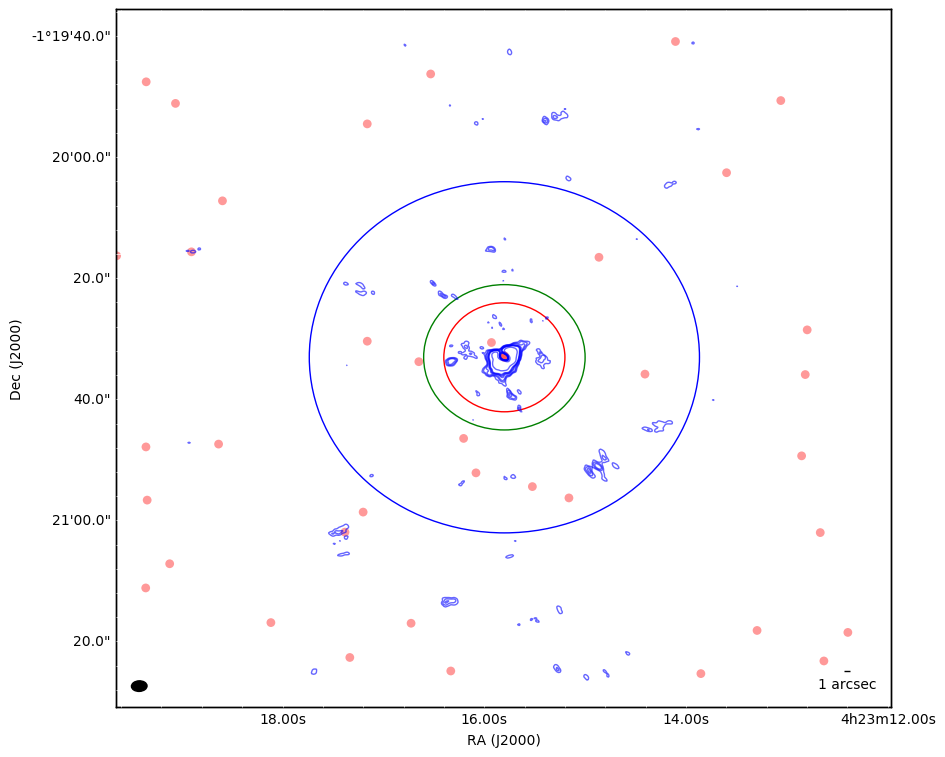

In [15]:
fig = aplpy.FITSFigure(B3)
fig.add_beam()
fig.beam.set_color('black')
fig.add_scalebar(1 * u.arcsecond)
fig.scalebar.set_label('1 arcsec')
fig.scalebar.set_color("black")

fig.show_contour(B3, colors='blue', levels=lvlB3, alpha=0.6)
fig.show_markers(ra_ned, dec_ned, edgecolor='none', facecolor='red', marker='o', s=40, alpha=0.4)
# primary beam circle
fig.show_circles(center_x, center_y, PB/2.0, edgecolor=['blue', 'green', 'red'])

#fig.show_colorscale(cmap='hot')

+ 1 source at the bottom-left, match